## Support lines strategy

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from SupportLinesStrategy import SupportLinesStrategy

In [2]:
test = pd.read_csv('./data/2018-1-1-BTCUSDT-5m.csv').take(range(805))

In [3]:
strategy = SupportLinesStrategy(n=13)

In [4]:
for _, row in test.iterrows():
    ts = datetime.fromtimestamp(row['Open time']/1000)
    strategy.capture(ts, row['Open'], row['Close'], row['High'], row['Low'], row['Volume'], row['Number of trades'])

Text(0.5, 0, 'Intervals')

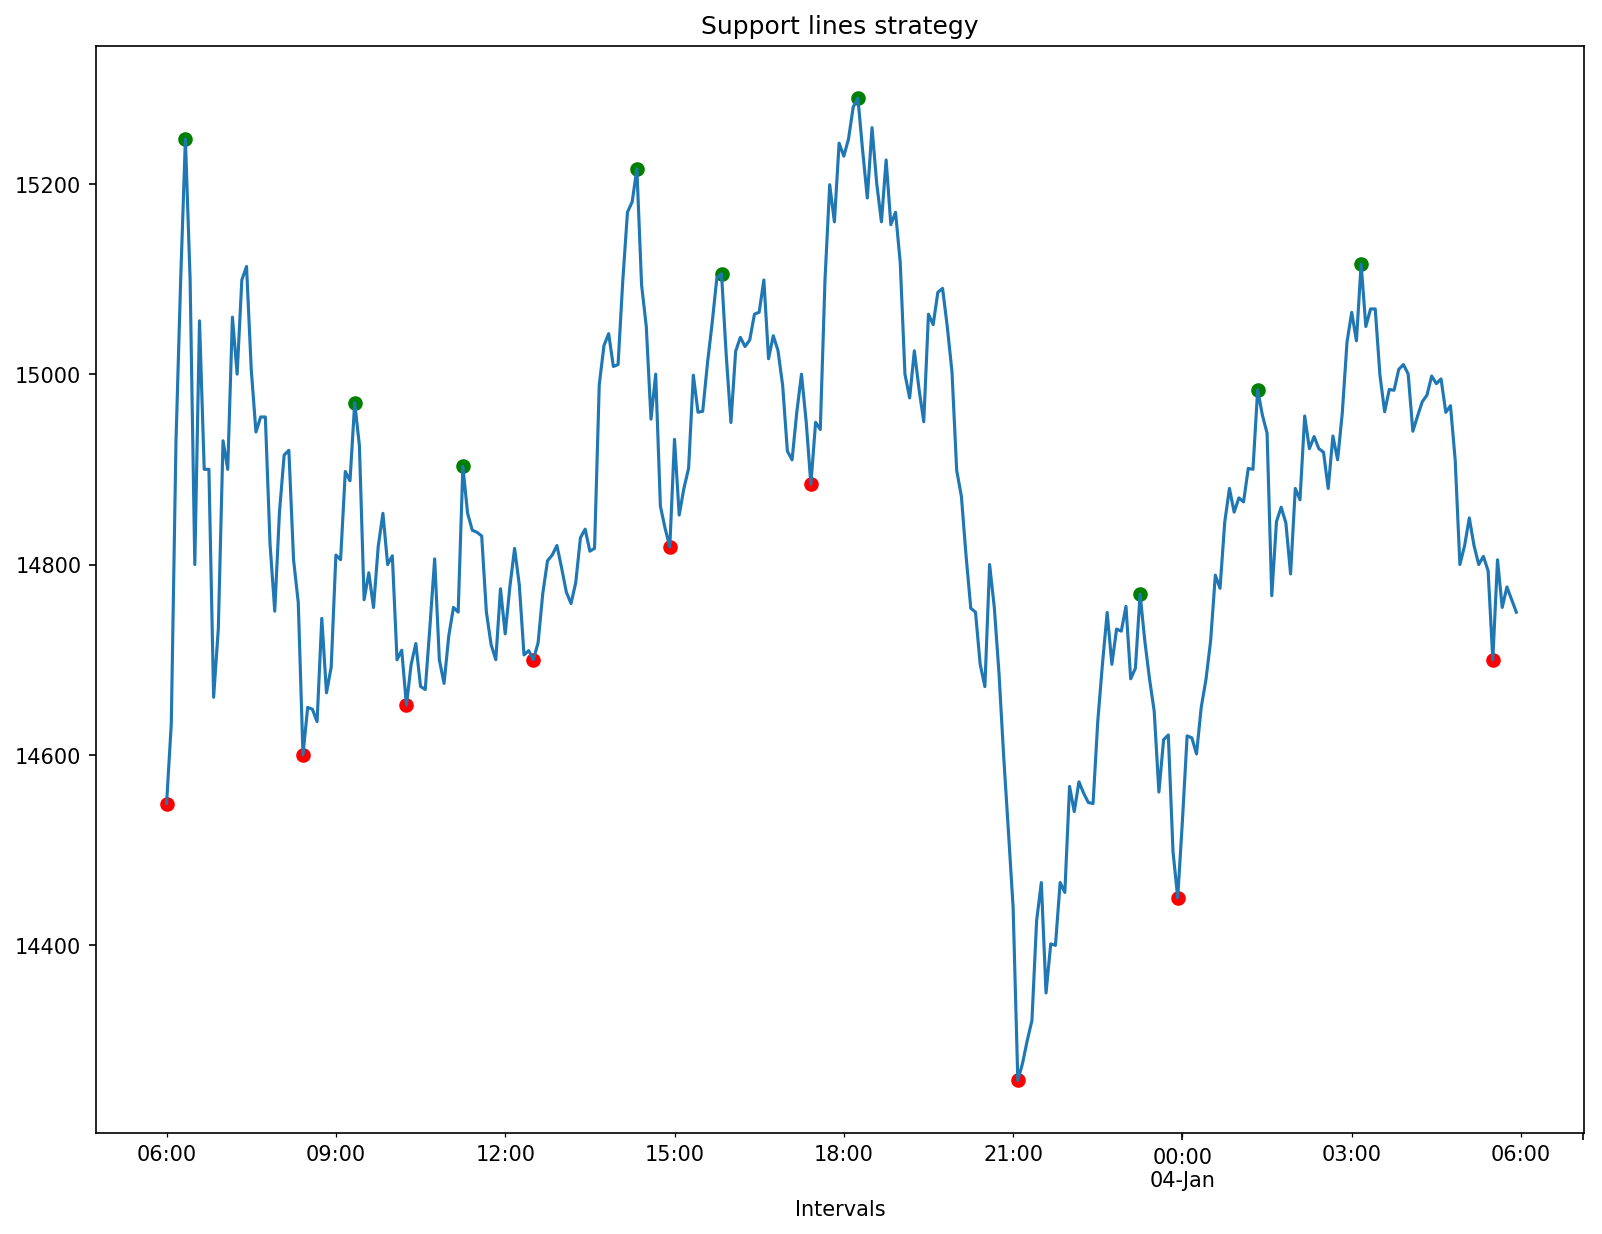

In [5]:
plt.figure(figsize=(12.8, 9.6), dpi=150)

strategy.df["close"].plot()
plt.scatter(strategy.df.index, strategy.df['min'], c='r')
plt.scatter(strategy.df.index, strategy.df['max'], c='g')
plt.title("Support lines strategy")
plt.xlabel("Intervals")

In [6]:
strategy.mins


[[-12726468.406426243, 0.008410127504553744],
 [-28497701.907058693, 0.01881960784313717]]